# **Data Pensionistas**

In [321]:
import pandas as pd
import numpy as np
import requests
import pandas as pd
import missingno as msno
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [237]:
url='https://github.com/Saul-Ochoa/Python-UTEC/raw/main/Datos_pensionistas.xlsx'
df=pd.read_excel(url)
df.head()

,id_persona,Prestacion,sexopen,Fecha de nacimiento,Edad,Combinada,estcivil,pension,Domicilio,Deposito,Años_aporte
0,8243200.0,Viudez,Mujer,1959-02-20,62.0,Hasta 65 años,Viudo,1719.12,Ucayali,Ucayali,27.0
1,77176200.0,Viudez,Mujer,1956-06-15,65.0,65 a 70 años,Viudo,481.17,Lima,Lima,42.0
2,84173200.0,Invalidez,Hombre,1969-11-11,52.0,Hasta 65 años,Soltero,655.90,MadredeDios,MadredeDios,33.0
3,401940200.0,Invalidez,Hombre,1952-05-29,69.0,65 a 70 años,Casado,564.63,Tacna,Tacna,22.0
4,403029200.0,Invalidez,Hombre,1964-06-21,57.0,Hasta 65 años,Casado,907.43,Lima,Lima,26.0


In [238]:
df.shape

(1301, 11)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_persona           1290 non-null   float64       
 1   Prestacion           1263 non-null   object        
 2   sexopen              1263 non-null   object        
 3   Fecha de nacimiento  1263 non-null   datetime64[ns]
 4   Edad                 1263 non-null   float64       
 5   Combinada            1263 non-null   object        
 6   estcivil             1263 non-null   object        
 7   pension              1263 non-null   float64       
 8   Domicilio            1263 non-null   object        
 9   Deposito             1263 non-null   object        
 10  Años_aporte          1290 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 111.9+ KB


In [240]:
df.select_dtypes(include='object').nunique()

Prestacion     2
sexopen        2
Combinada      6
estcivil       4
Domicilio     22
Deposito      22
dtype: int64

In [241]:
df.select_dtypes(include='number').nunique()

id_persona     1287
Edad             58
pension        1100
Años_aporte      56
dtype: int64

In [242]:
df.isnull().sum()

id_persona             11
Prestacion             38
sexopen                38
Fecha de nacimiento    38
Edad                   38
Combinada              38
estcivil               38
pension                38
Domicilio              38
Deposito               38
Años_aporte            11
dtype: int64

In [243]:
df.isnull().sum().sum()

364

**Analizar datos faltantes**

<Axes: >

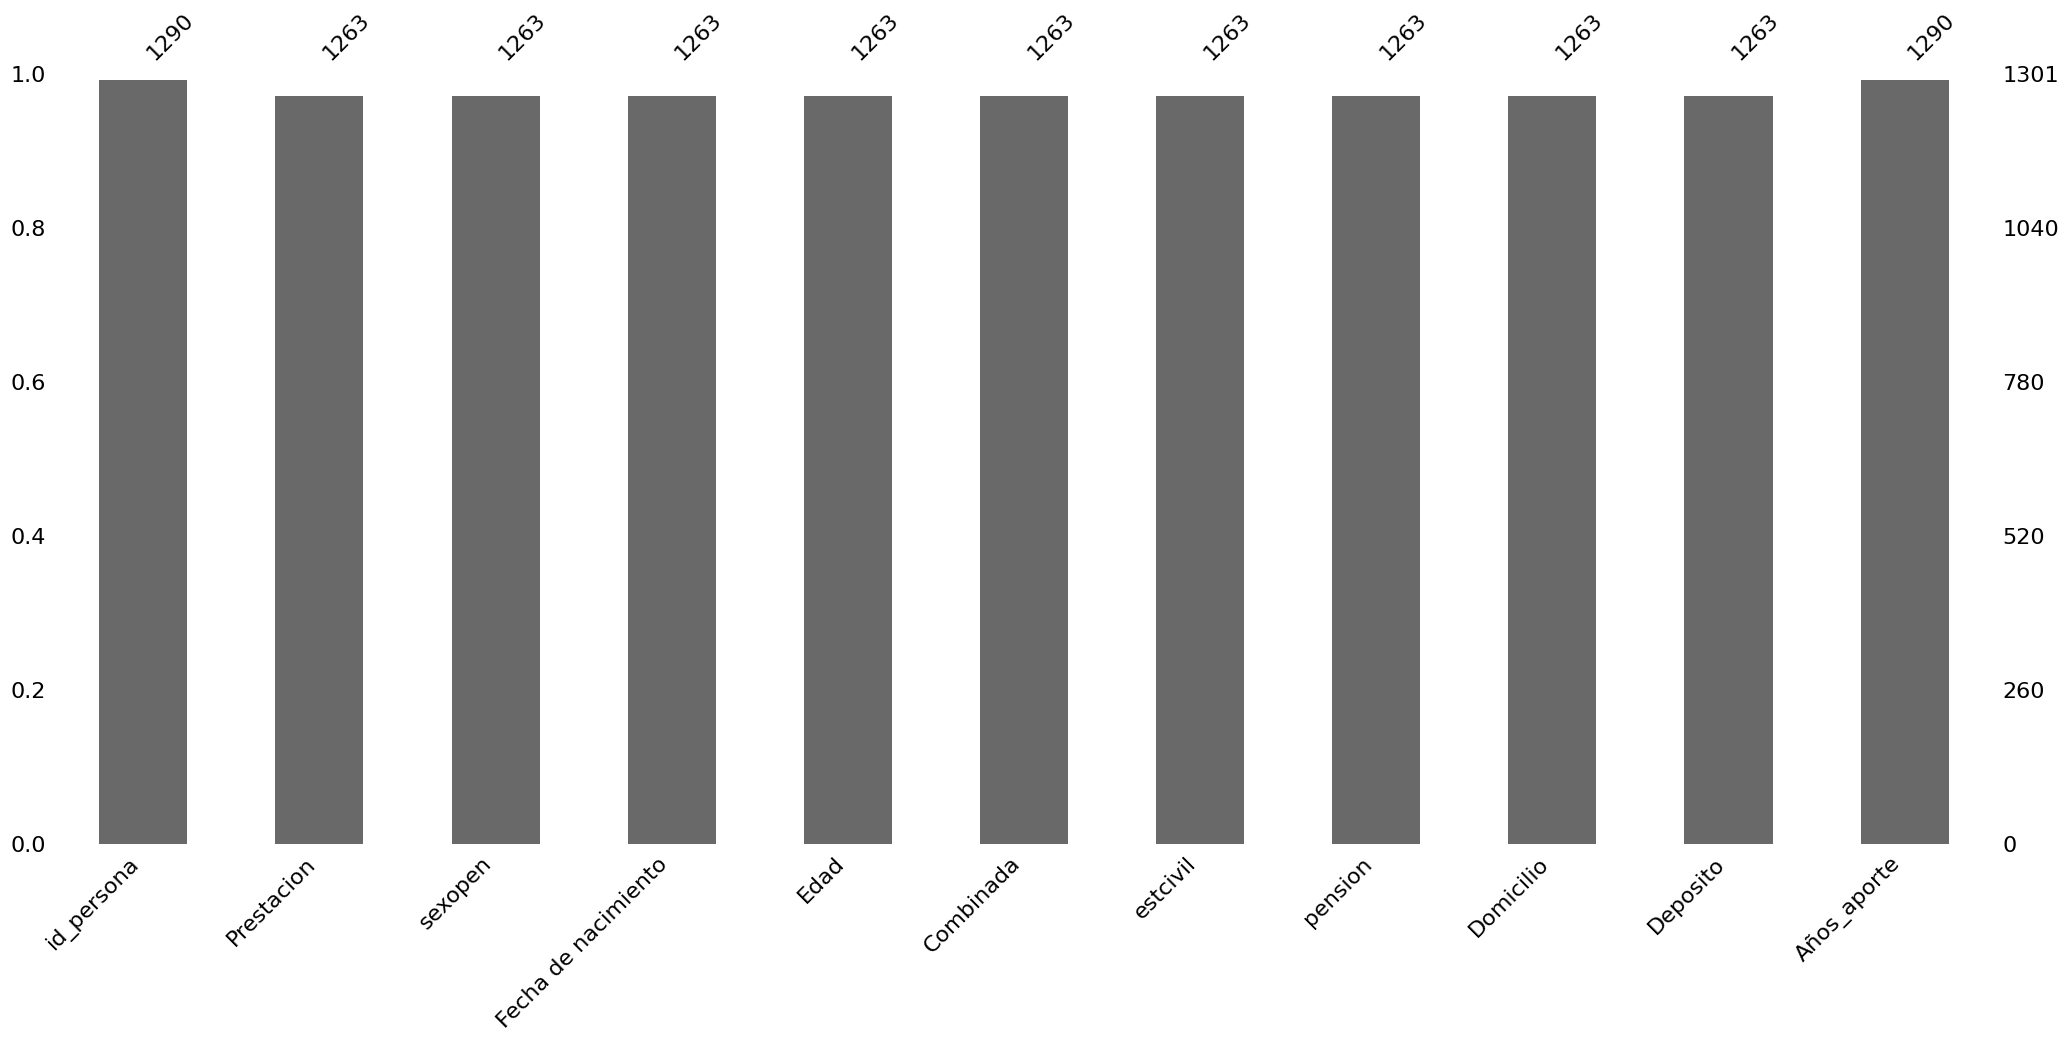

In [244]:
msno.bar(df)

* **Segun el grafico de barras muestras que las columnas id_personas y años_aporte son las columnas que tienen la mayor cantidad de datos en diferencias a las otra columnas faltantes.**

<Axes: >

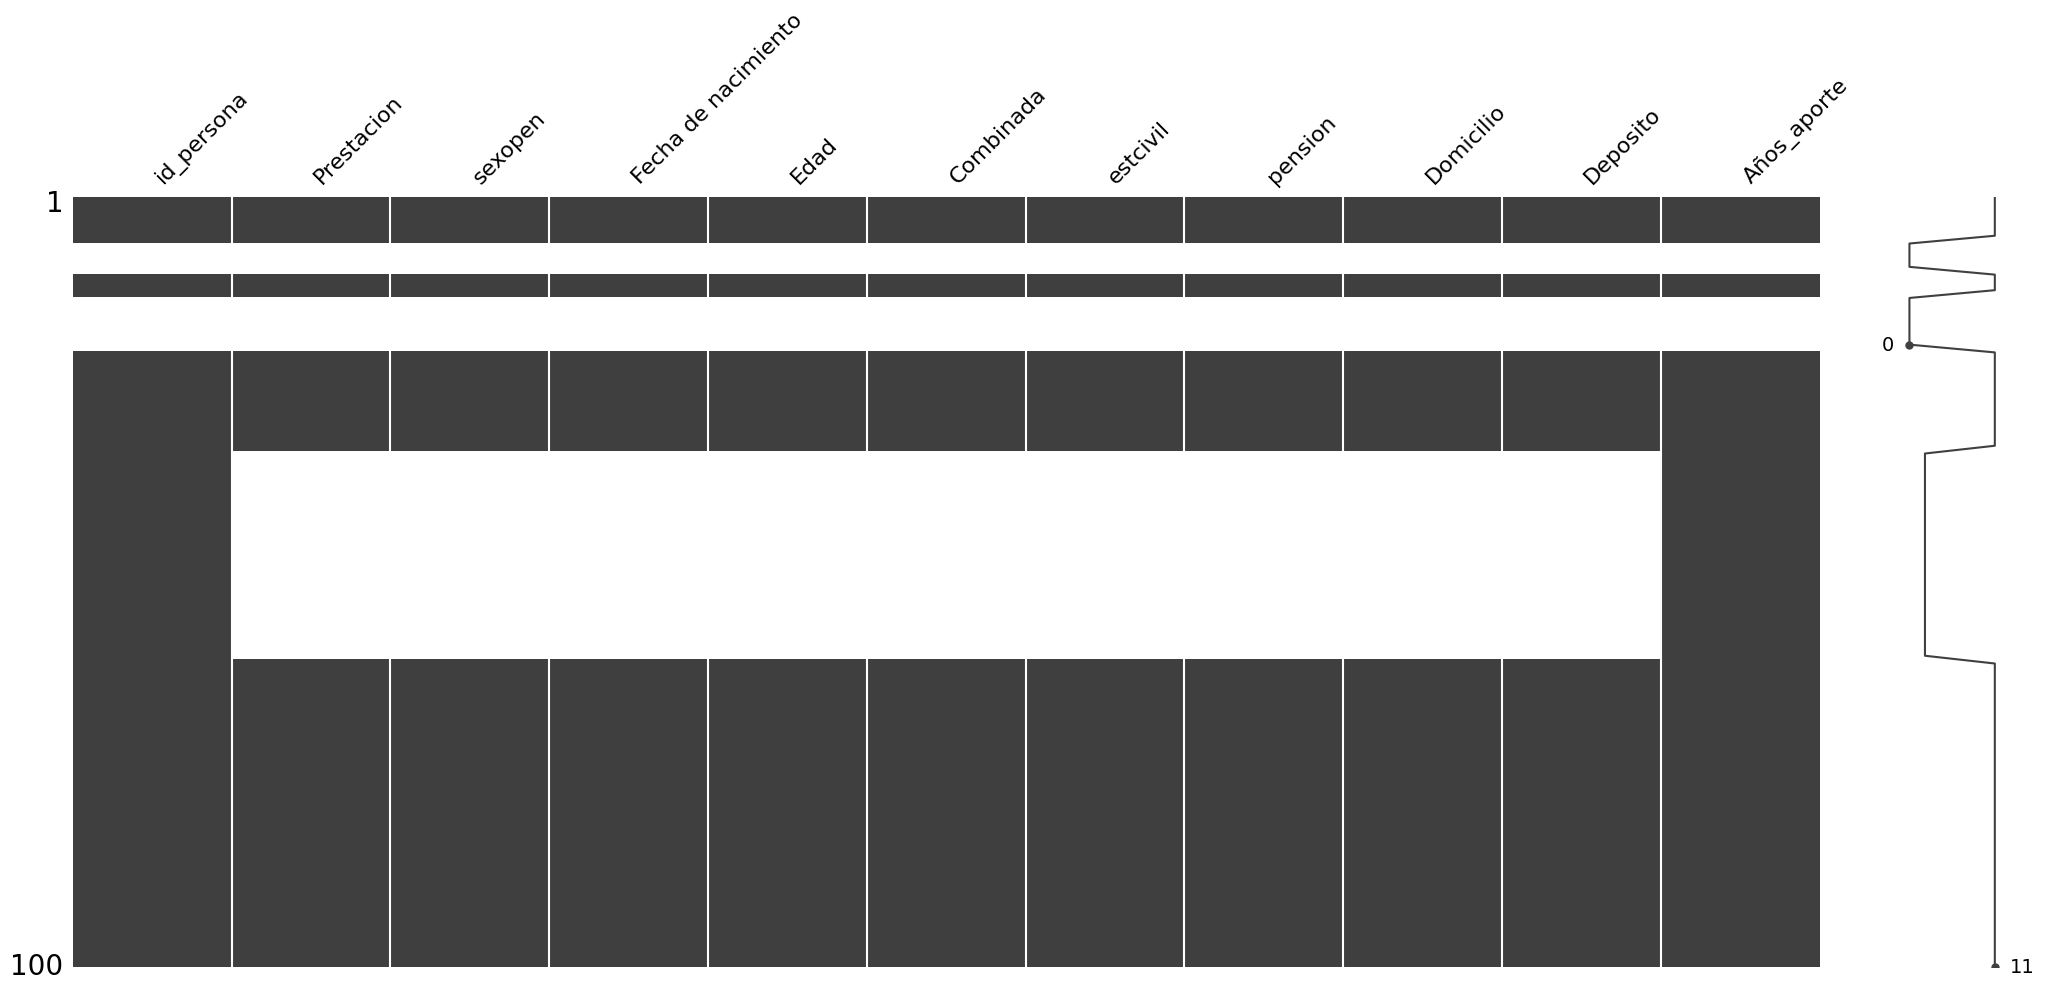

In [245]:
msno.matrix(df.head(100))

* **El grafico de matrix nos muestra las zonas blancas son donde se ubican los datos vacios dentro de la data**

<Axes: >

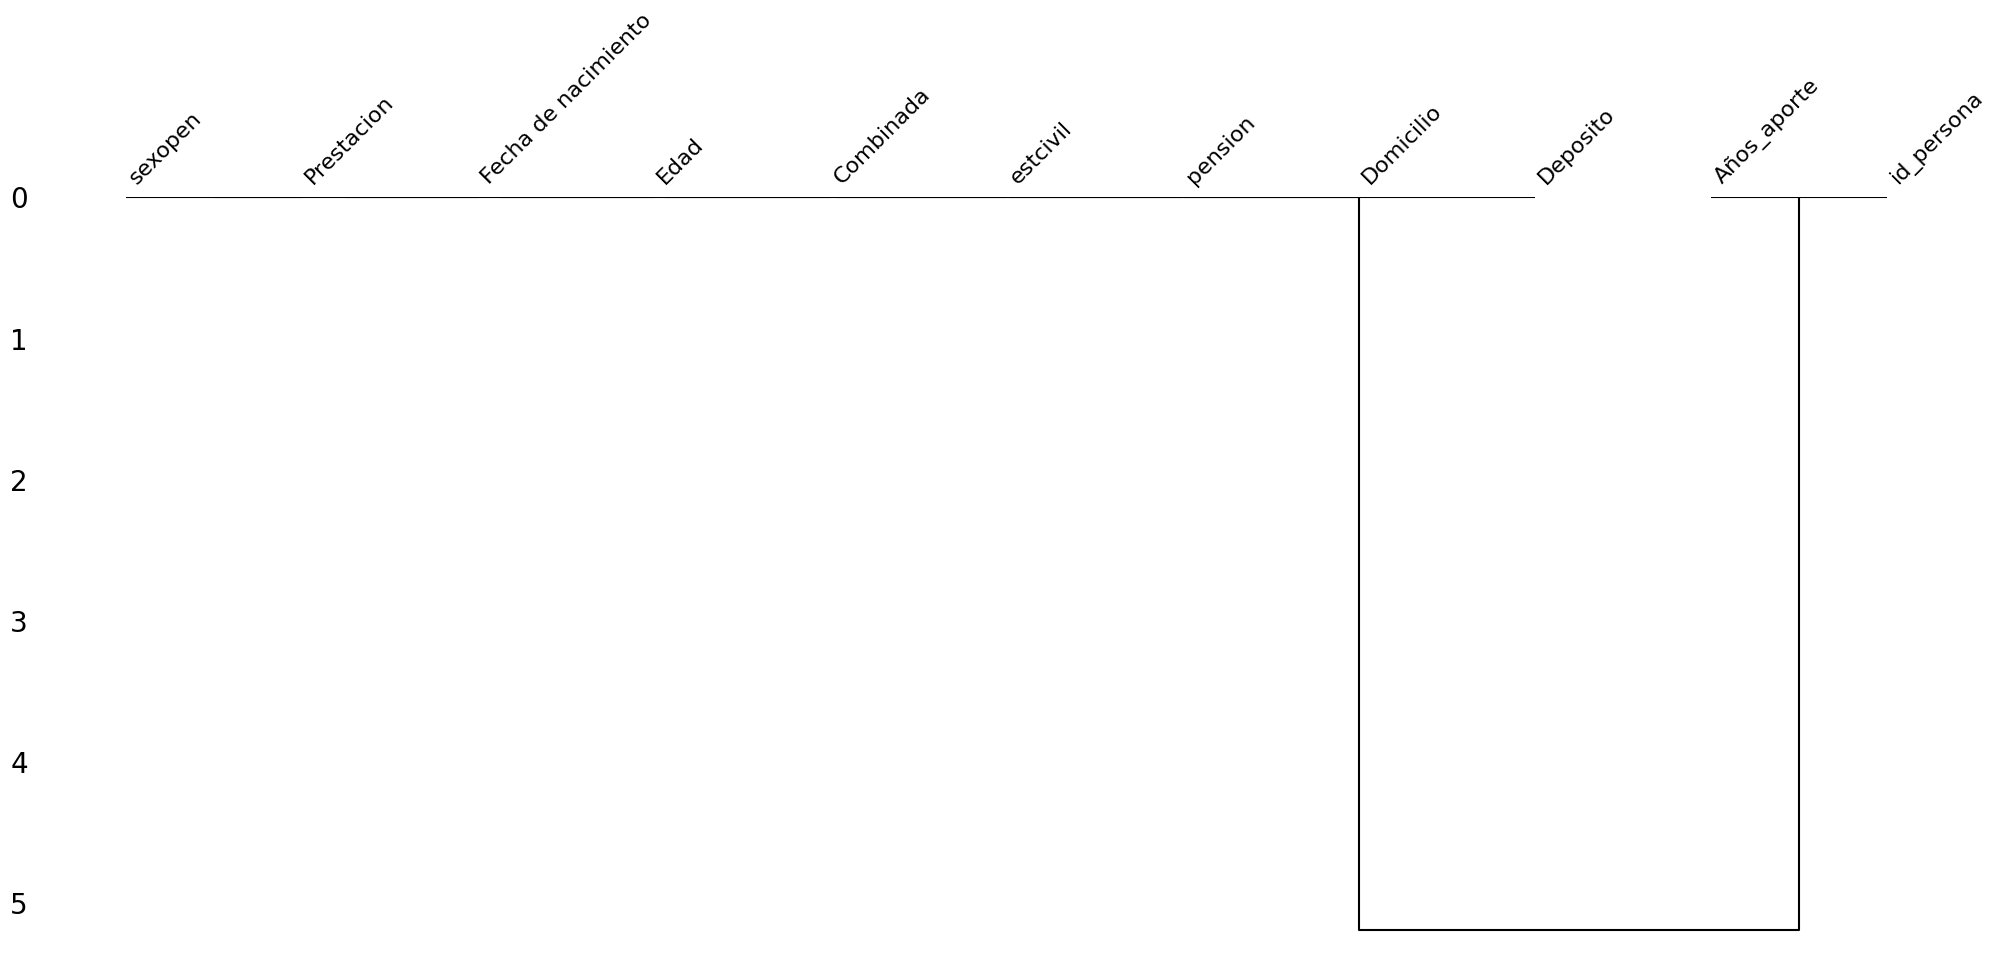

In [246]:
msno.dendrogram(df.head(100))

<Axes: >

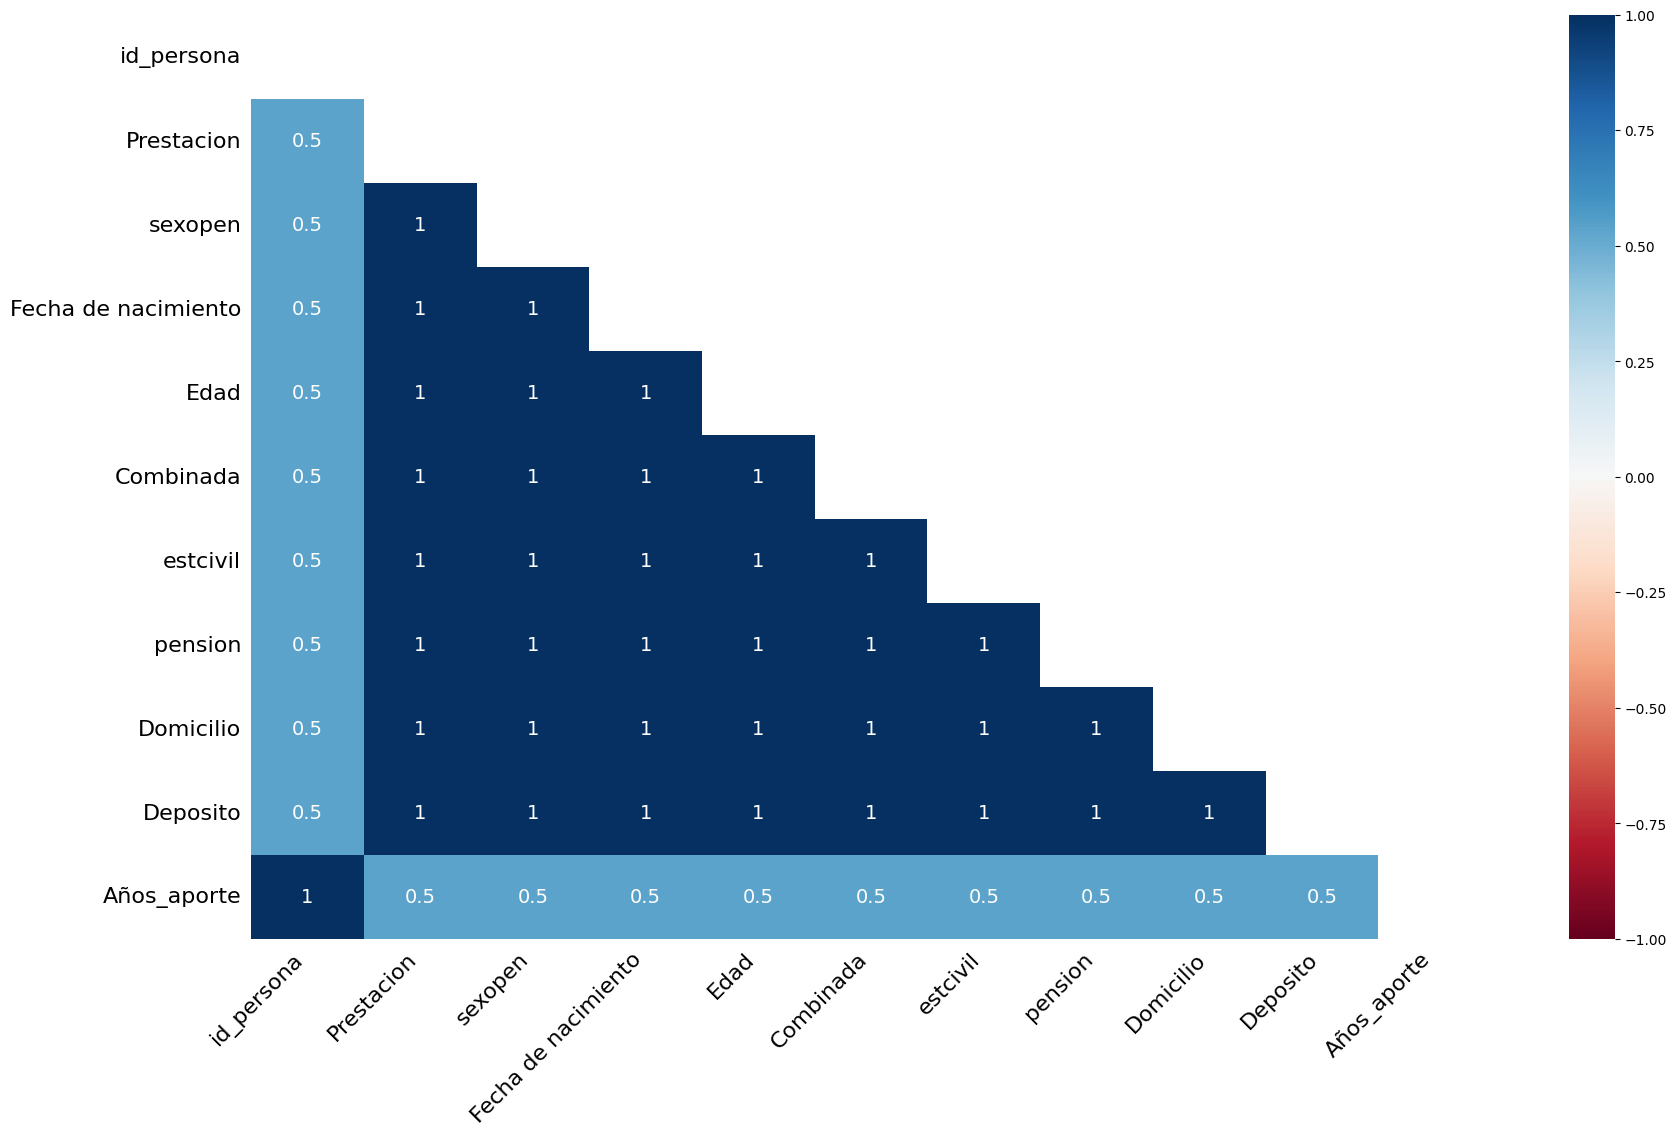

In [247]:
msno.heatmap(df)

* **Segun el dendograma las columnas de Años_aporte y id_persona contienen datos pero las demas columnas estan vacias**
* **Por otra parte, existen columnas que no tienen datos**

* **En resumen**
  
1. Se procede eliminar todas las columnas vacias, ya que en algunos casos todas las columnas estan vacias.
2. En otro caso solo contamos con el id y años de aporte y las demas columnas vacias es por eso que se porcede elimnar estas filas incompletas.

In [248]:
df.dropna(inplace=True)


In [249]:
df.isnull().sum()

id_persona             0
Prestacion             0
sexopen                0
Fecha de nacimiento    0
Edad                   0
Combinada              0
estcivil               0
pension                0
Domicilio              0
Deposito               0
Años_aporte            0
dtype: int64

In [250]:
df.isnull().sum().sum()

0

In [251]:
# Eliminarmos la columna id_persona
df.drop(columns='id_persona',inplace=True,axis=1)

In [252]:
df.head()

,Prestacion,sexopen,Fecha de nacimiento,Edad,Combinada,estcivil,pension,Domicilio,Deposito,Años_aporte
0,Viudez,Mujer,1959-02-20,62.0,Hasta 65 años,Viudo,1719.12,Ucayali,Ucayali,27.0
1,Viudez,Mujer,1956-06-15,65.0,65 a 70 años,Viudo,481.17,Lima,Lima,42.0
2,Invalidez,Hombre,1969-11-11,52.0,Hasta 65 años,Soltero,655.90,MadredeDios,MadredeDios,33.0
3,Invalidez,Hombre,1952-05-29,69.0,65 a 70 años,Casado,564.63,Tacna,Tacna,22.0
4,Invalidez,Hombre,1964-06-21,57.0,Hasta 65 años,Casado,907.43,Lima,Lima,26.0


## **Analizar las variables Categoricas**

In [253]:
df.select_dtypes(include='object').nunique()

Prestacion     2
sexopen        2
Combinada      6
estcivil       4
Domicilio     22
Deposito      22
dtype: int64

In [254]:
df.columns

Index(['Prestacion', 'sexopen', 'Fecha de nacimiento', 'Edad', 'Combinada',
       'estcivil', 'pension', 'Domicilio', 'Deposito', 'Años_aporte'],
      dtype='object')

In [255]:
lista = ['Prestacion', 'sexopen','Combinada','estcivil','Domicilio', 'Deposito']

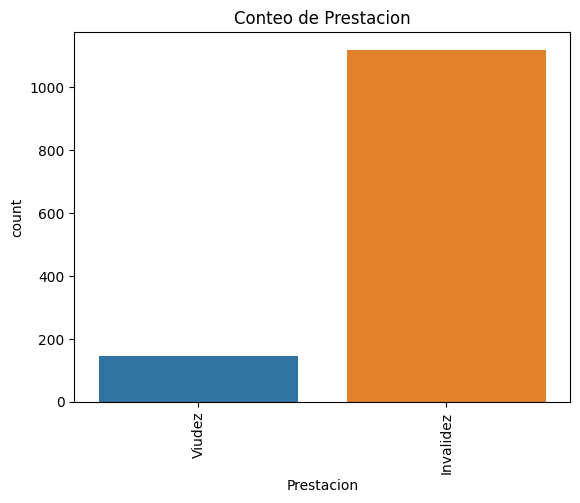

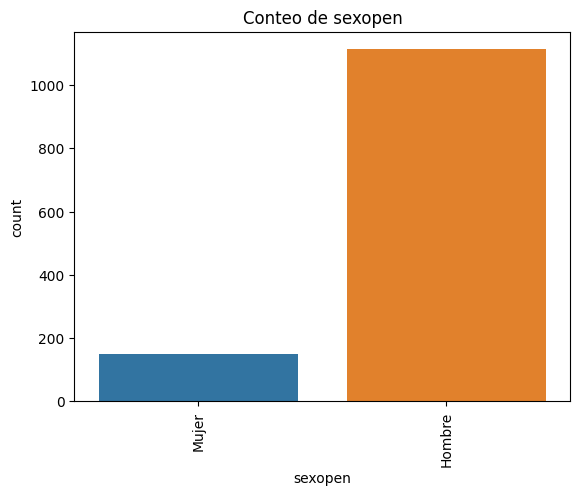

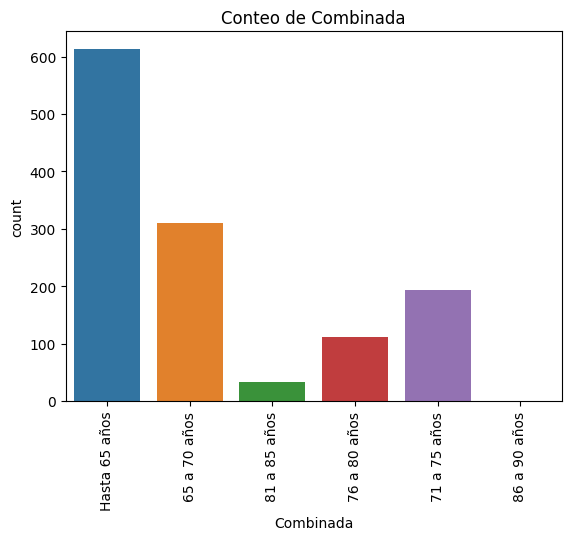

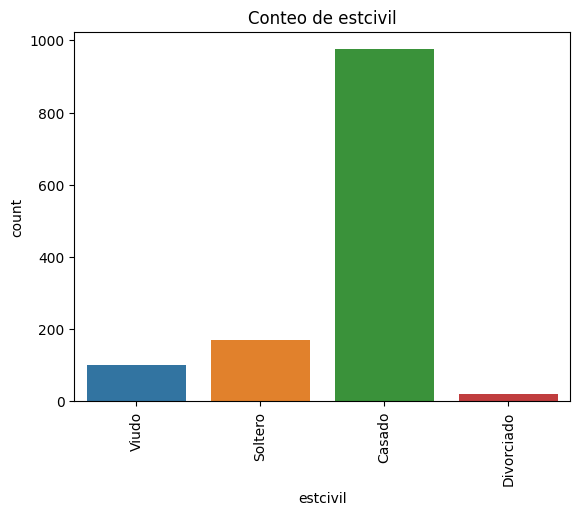

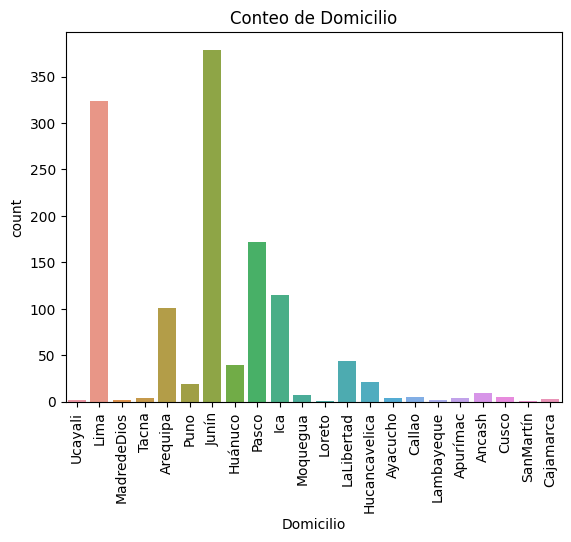

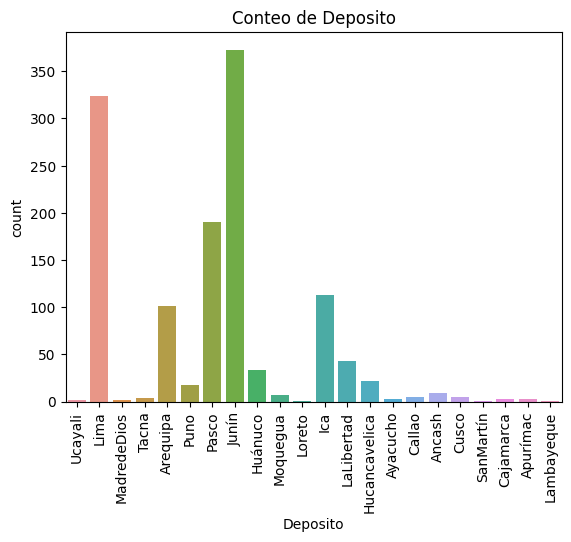

In [256]:
for i in lista:
    sns.countplot(data=df,x=i)
    plt.xticks(rotation='vertical')
    plt.title(f"Conteo de {i}")
    plt.show()

In [257]:
for i in lista:
    fig=px.histogram(df,x=i,title=f'Conteo de {i}',template='plotly_dark')
    fig.update_layout(yaxis_title='Conteo',
        font=dict(
        family="Courier New, monospace",
        size=18,
    ),title={'y':0.9,'x':0.5,'xanchor':'center', 'yanchor':'bottom'})
    fig.show()

* En esta Graficas de barras se muestra cuantas veces se repite la variables categoricas.

In [258]:
df.head()

,Prestacion,sexopen,Fecha de nacimiento,Edad,Combinada,estcivil,pension,Domicilio,Deposito,Años_aporte
0,Viudez,Mujer,1959-02-20,62.0,Hasta 65 años,Viudo,1719.12,Ucayali,Ucayali,27.0
1,Viudez,Mujer,1956-06-15,65.0,65 a 70 años,Viudo,481.17,Lima,Lima,42.0
2,Invalidez,Hombre,1969-11-11,52.0,Hasta 65 años,Soltero,655.90,MadredeDios,MadredeDios,33.0
3,Invalidez,Hombre,1952-05-29,69.0,65 a 70 años,Casado,564.63,Tacna,Tacna,22.0
4,Invalidez,Hombre,1964-06-21,57.0,Hasta 65 años,Casado,907.43,Lima,Lima,26.0


In [259]:
lista=['Prestacion', 'sexopen','estcivil', 'Domicilio', 'Deposito']

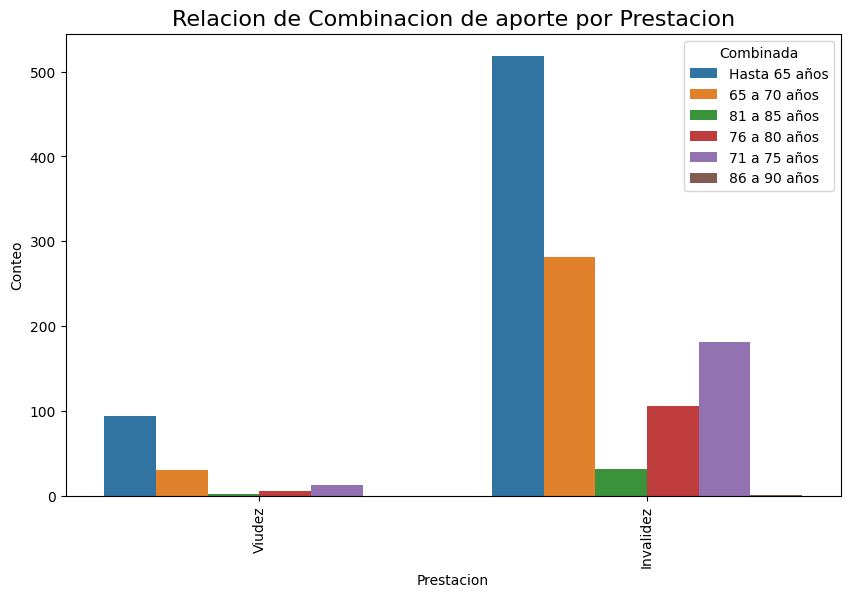

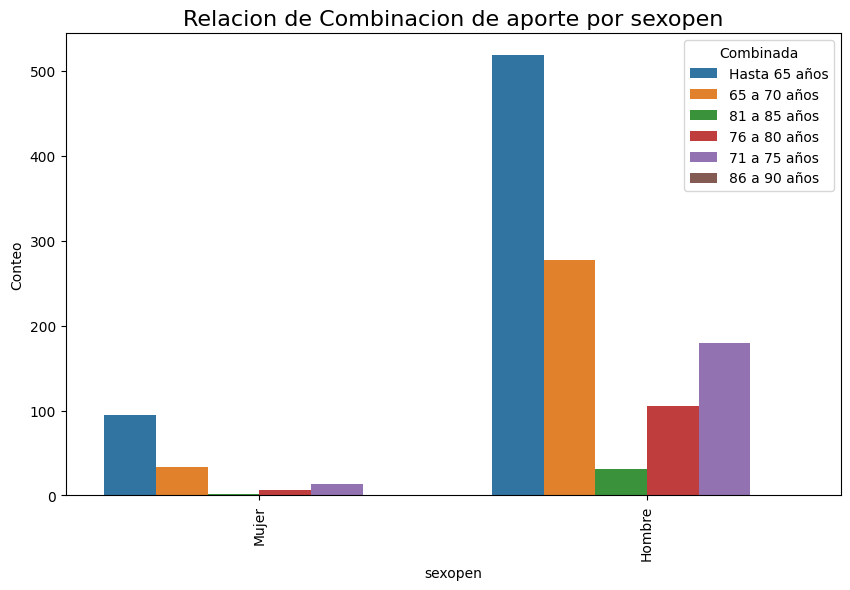

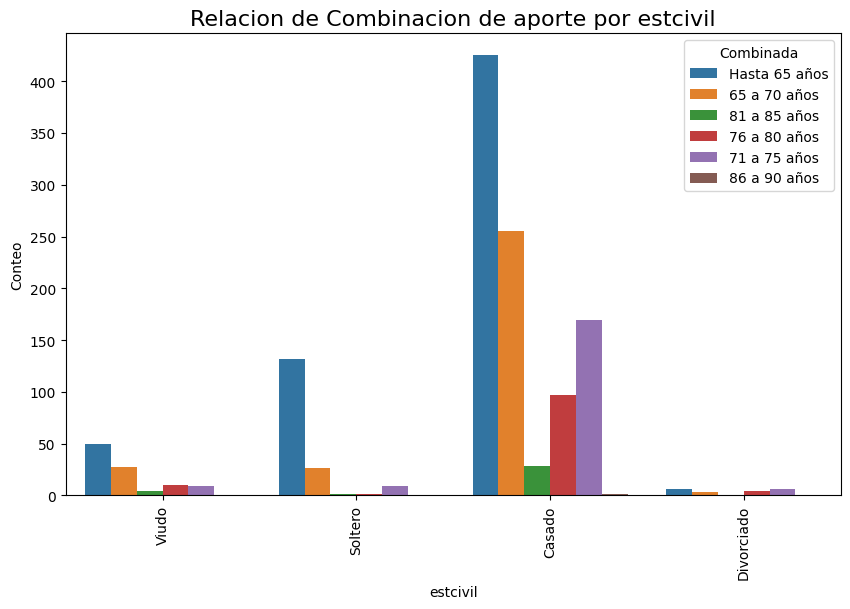

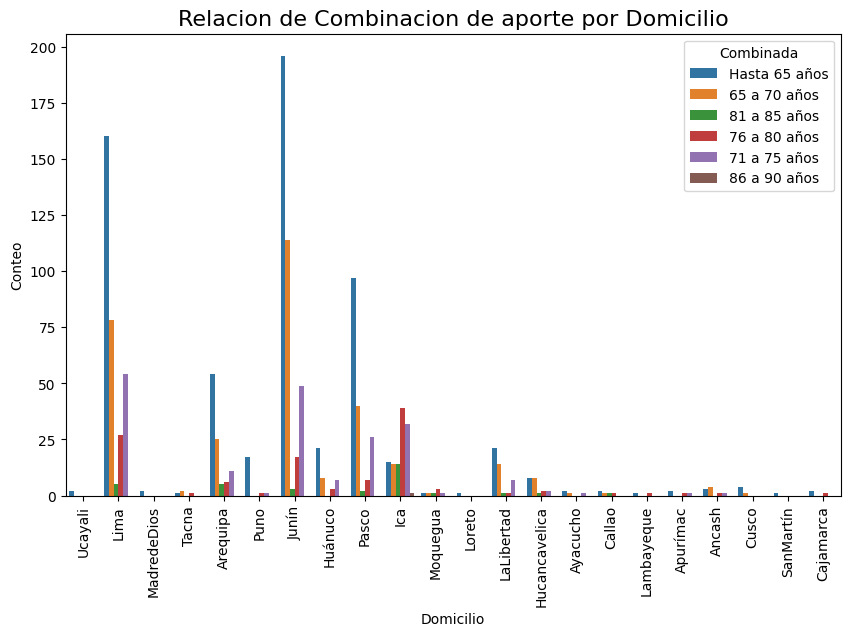

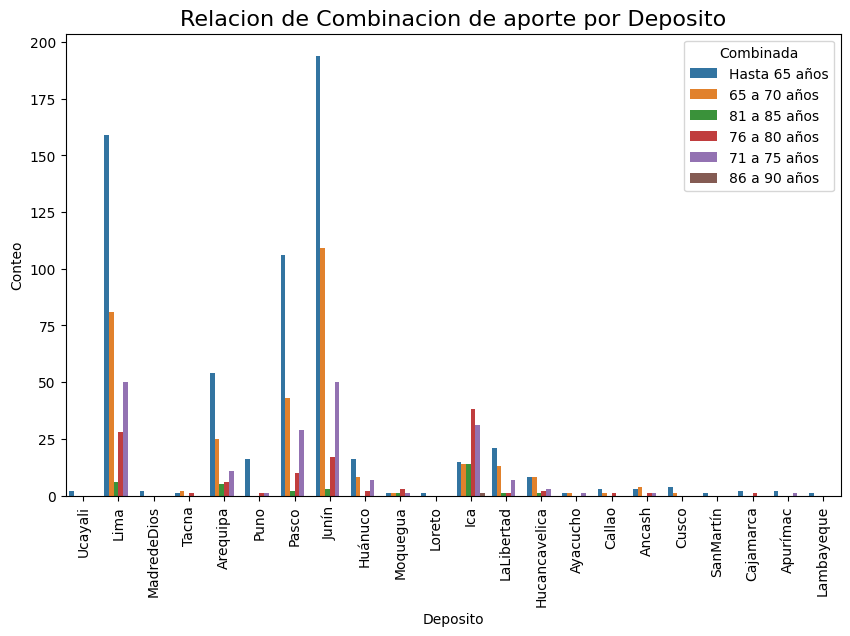

In [260]:
for i in lista:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df,x=i,hue='Combinada')
    plt.title(f"Relacion de Combinacion de aporte por {i}",fontsize=16)
    plt.xticks(rotation='vertical')
    plt.ylabel('Conteo')
    plt.show()

In [261]:
for i in lista:
    fig=px.histogram(df,x=i,title=f'Conteo de {i}',template='plotly_dark',color='Combinada')
    fig.update_layout(yaxis_title='Conteo',
        font=dict(
        family="Courier New, monospace",
        size=18,
    ),title={'y':0.9,'x':0.5,'xanchor':'center', 'yanchor':'bottom'})
    fig.show()

* En este grafico de barras agrupadas se puede observar la relacion que exste entre las diferentes variables categoricas segun el rango de vida y siendo el dato "hasta 65 años", el que mas resalta de todos.

## **Analizar las Variables Nuemericas**

In [262]:
df.head()

,Prestacion,sexopen,Fecha de nacimiento,Edad,Combinada,estcivil,pension,Domicilio,Deposito,Años_aporte
0,Viudez,Mujer,1959-02-20,62.0,Hasta 65 años,Viudo,1719.12,Ucayali,Ucayali,27.0
1,Viudez,Mujer,1956-06-15,65.0,65 a 70 años,Viudo,481.17,Lima,Lima,42.0
2,Invalidez,Hombre,1969-11-11,52.0,Hasta 65 años,Soltero,655.90,MadredeDios,MadredeDios,33.0
3,Invalidez,Hombre,1952-05-29,69.0,65 a 70 años,Casado,564.63,Tacna,Tacna,22.0
4,Invalidez,Hombre,1964-06-21,57.0,Hasta 65 años,Casado,907.43,Lima,Lima,26.0


In [263]:
df.select_dtypes(include='number').columns

Index(['Edad', 'pension', 'Años_aporte'], dtype='object')

In [264]:
lista=['Edad', 'pension', 'Años_aporte']

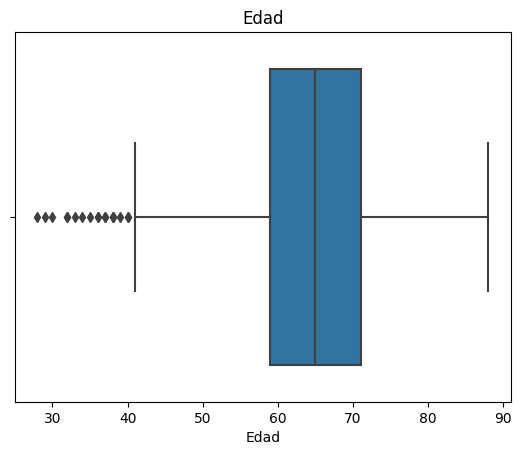

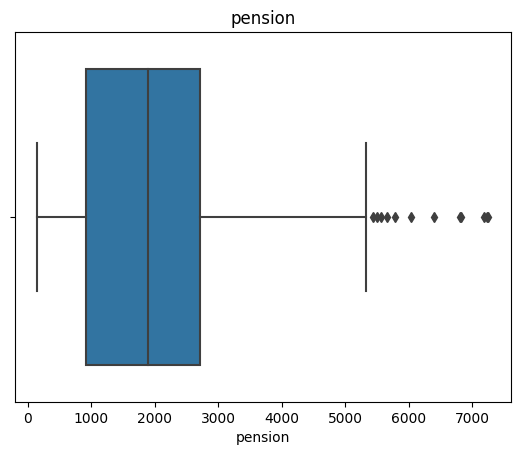

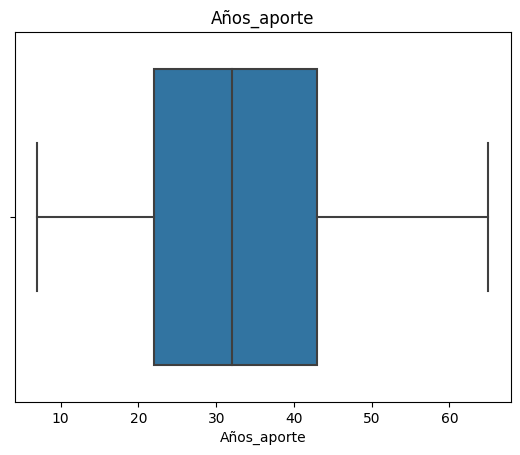

In [265]:
for i in lista:
    sns.boxplot(data=df,x=i)
    plt.title(i)
    plt.show()

In [266]:
for i in lista:
    fig = px.box(df, x=i,template='plotly_dark',title=i)
    fig.update_layout(
    font=dict(
    family="Courier New, monospace",
    size=18,
    ),title={'y':0.9,'x':0.5,'xanchor':'center', 'yanchor':'bottom'})
    fig.show()

* **Analisis del Boxplot** 
  
* Tal como se muestra en el boxplot de edad tiene algunos outliers, pero esto es entendible ya que algunas edades estan en el rango de 30 a 40 años, por que estan iniciando para el aporte de sus pensiones o jubilaciones.

*  La pension tambien presenta algunos outliers. Sin embargo, es normal ya qu esto va depender de los años de aporte.

* Los años de aporte no presenta outlier.

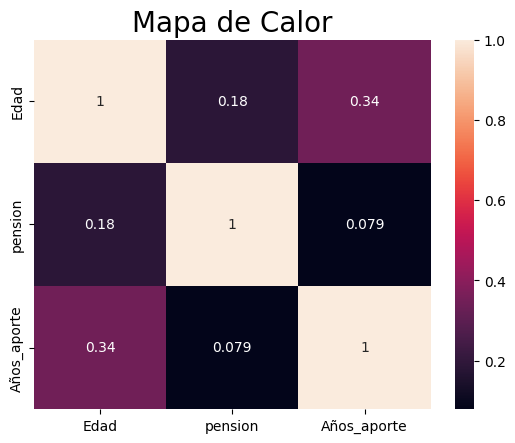

In [267]:
sns.heatmap(df.corr(),annot=True)
plt.title('Mapa de Calor',fontsize=20)
plt.show()

In [268]:
df.columns

Index(['Prestacion', 'sexopen', 'Fecha de nacimiento', 'Edad', 'Combinada',
       'estcivil', 'pension', 'Domicilio', 'Deposito', 'Años_aporte'],
      dtype='object')

In [269]:
df_mum=df.loc[:,['Edad','Años_aporte','pension']]
df_mum.head()

,Edad,Años_aporte,pension
0,62.0,27.0,1719.12
1,65.0,42.0,481.17
2,52.0,33.0,655.90
3,69.0,22.0,564.63
4,57.0,26.0,907.43


In [270]:
fig=px.density_heatmap(df_mum,x='Edad',y='Años_aporte',text_auto=True,title='Mapa de Calor Edad vs Años Aporte',nbinsx=20, nbinsy=20, color_continuous_scale="Viridis")
fig.show()

In [271]:
fig=px.density_heatmap(df_mum,x='Edad',y='pension',text_auto=True,title='Mapa de Calor Edad vs Pension',nbinsx=20, nbinsy=20, color_continuous_scale="Viridis")
fig.show()

In [272]:
fig=px.density_heatmap(df_mum,x='Años_aporte',y='pension',text_auto=True,title='Mapa de Calor Años Aporte vs Pension',nbinsx=20, nbinsy=20, color_continuous_scale="Viridis")
fig.show()

## Analisis Descriptivo

In [273]:
df.describe()

,Edad,pension,Años_aporte
count,1263.000000,1263.000000,1263.000000
mean,64.657165,1967.677791,32.874901
std,9.096444,1252.969207,12.352914
min,28.000000,152.360000,7.000000
25%,59.000000,923.520000,22.000000
50%,65.000000,1900.100000,32.000000
75%,71.000000,2706.540000,43.000000
max,88.000000,7250.450000,65.000000


In [274]:
# La edad maxima de hombre y mujeres
df_edad_max=df.groupby('sexopen')['Edad'].max()
df_edad_max=pd.DataFrame(df_edad_max, columns=['Edad'])
df_edad_max

,Edad
sexopen,
Hombre,88.0
Mujer,84.0


In [275]:
fig = px.pie(df_edad_max, values='Edad', names=df_edad_max.index, title='La edad Maxima de Hombre y Mujeres')
fig.show()

In [296]:
# La maxima pension recibido por genero
df_pension_max=df[['Domicilio','sexopen','pension']].groupby(['Domicilio','sexopen'])['pension'].max().reset_index()
df_pension_max.sort_values(['pension'],ascending=False,inplace=True)
df_pension_max.head()

,Domicilio,sexopen,pension
24,Lima,Hombre,7250.45
17,Ica,Hombre,7175.41
30,Pasco,Hombre,5564.64
19,Junín,Hombre,5491.31
4,Arequipa,Hombre,5281.34


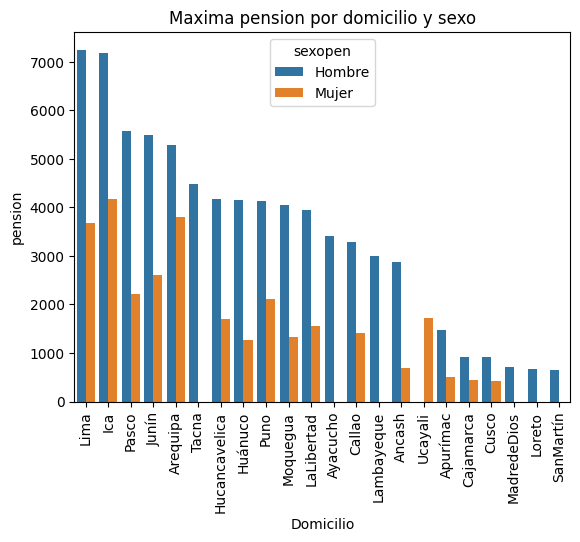

In [299]:
sns.barplot(data=df_pension_max,x='Domicilio',y='pension',hue='sexopen')
plt.xticks(rotation='vertical')
plt.title('Maxima pension por domicilio y sexo')
plt.show()

In [303]:
fig = px.bar(df_pension_max, x='Domicilio', y='pension', color='sexopen',title='Máxima pensión por domicilio y sexo')
fig.update_layout(
    xaxis_title='Domicilio',
    yaxis_title='Máxima pensión',
    title={'y':0.9,'x':0.5,'xanchor':'center', 'yanchor':'bottom'}
)
fig.show()

* Esta grafica nos muestra cuales fueron los domicilio por sexo que recibieron mas pension de la jubilacion

### Analisis entre las variables
  
1. Edad
2. Años_aporte
3. pension

In [304]:
df_mum.head()

,Edad,Años_aporte,pension
0,62.0,27.0,1719.12
1,65.0,42.0,481.17
2,52.0,33.0,655.90
3,69.0,22.0,564.63
4,57.0,26.0,907.43


In [305]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [310]:
corr_matrix = df_mum.corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,Edad,Años_aporte,0.344507,0.344507
3,Años_aporte,Edad,0.344507,0.344507
2,Edad,pension,0.183912,0.183912
6,pension,Edad,0.183912,0.183912
5,Años_aporte,pension,0.079065,0.079065
7,pension,Años_aporte,0.079065,0.079065


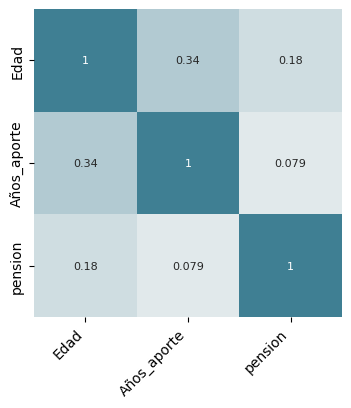

In [311]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

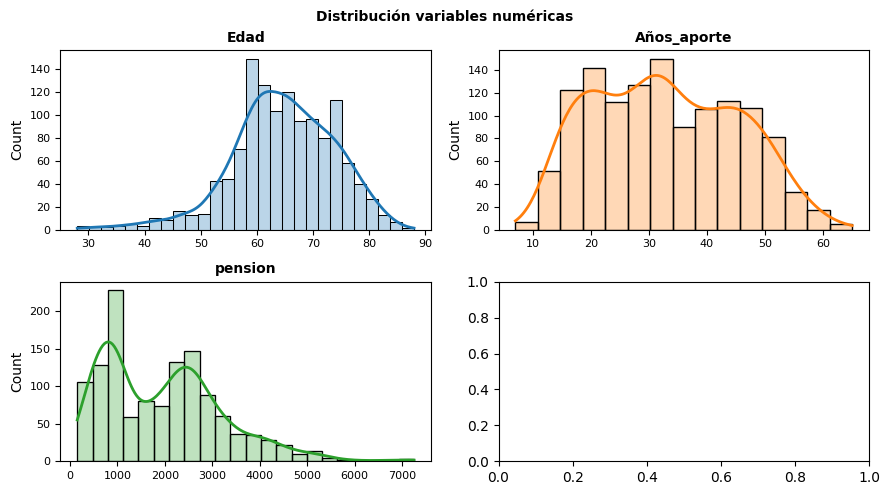

In [309]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_mum.columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_mum,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

* Los siguientes graficos son de distribucion.
  
1. El primer grafico nos muestra un grafico de distribucion de la pension esta sesgado hacia la derecha.
2. El segundo grafico nos muestra un grafico de distribucion de los años de aporte que puede ser aleatorio.
3. El tercer grafico nos muestra un grafico de distribucion 